![/kaggle/input/banklogo/BlueBankLogo.png](https://finch-groundhog-9245.squarespace.com/s/Blue-Bank-Logo.png)

# Blue Bank analysis

Blue Bank is a bank in USA that has a loan department which is currently understaffed. 
They supply loans to individuals and don’t have much reporting on how risky these 
borrowers are .

# JSON file


**In our project dataset as JSON file**

What is a JSON file? A JSON file stores data in key-value pairs and arrays; the software it was made for then accesses the data. JSON allows developers to store various data types as human-readable code, with the keys serving as names and the values containing related data .

In [1]:
import json 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
#TO load josn data
josn_file=open('/kaggle/input/loan-data/loan_data_json.json')
data=json.load(josn_file)

In [3]:
#transform to dataframe
df=pd.DataFrame(data)

In [4]:
#Veiw frist 5rows
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
#Veiw last 5 rows
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [6]:
#get information of our data  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
#describe data

df.describe()
#describe a specific column
df['fico'].describe()

count    9578.000000
mean      710.846314
std        37.970537
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max       827.000000
Name: fico, dtype: float64

In [8]:
#explore Our data
#unique() method is used to know all type of unique values in a column.
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [9]:
df['credit.policy'].unique()

array([1, 0])

# NumPy
**We need to import NumPy ,why?**
* NumPy is a Python library used for working with arrays.
* It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* In Python we have lists that serve the purpose of arrays, but they are slow to process.
* NumPy aims to provide an array object that is up to 50x faster than traditional Python lists.

In [10]:
# The standard way to import NumPy:
import numpy as np

In [11]:
# create new column annual income using EXP() of annual.inc log 
df['annual_income']=np.exp(df['log.annual.inc'])
df['annual_income']=round(df['annual_income'],2)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,32000.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80800.0


# IF Statement
The if statement tells the Python interpreter to 'conditionally' execute a particular block of code. Using if, you can tell Python to do something under a condition. 
Therefore, decision flow control means 'deciding' the order in which statements would be executed at run time.

In our case we have fico's conditions which Describe the individual financial situation between poverty and wealth. 

**Fico Ranges**
* fico >= 300 and < 400: 'Very Poor'
* fico >= 400 and ficoscore < 600: 'Poor'
* fico >= 601 and ficoscore < 660: 'Fair'
* fico >= 660 and ficoscore < 780: 'Good'
* fico >=780: 'Excellent'

In [12]:
def fun(rang):
    if rang>=780:
        return "Excellent"
    elif rang>=660:
        return "Good"
    elif rang>=601:
        return "Fair"
    elif rang>=400:
        return "Poor"
    elif rang>=300:
        return "Very Poor"
    else:
        return "Unkown"

df['New_Fico']=df['fico'].apply(fun)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,New_Fico
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.0,Good
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.0,Good
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,32000.0,Good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.0,Good
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80800.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,195000.0,Good
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,69000.0,Good
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,40000.0,Good
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,50000.0,Good


In [13]:

df[df['New_Fico']=="Excellent"]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,New_Fico
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0,110000.0,Excellent
21,1,all_other,0.0863,474.42,10.819778,2.59,797,11951.000000,5656,27.6,0,0,0,0,50000.0,Excellent
23,1,credit_card,0.0788,484.85,11.736069,7.05,782,5640.041667,16931,34.6,1,0,0,0,125000.0,Excellent
26,1,all_other,0.0743,155.38,11.082143,0.28,802,4649.958333,1576,5.7,1,0,0,0,65000.0,Excellent
29,1,all_other,0.0743,155.38,12.206073,3.72,812,6778.958333,85607,0.7,0,0,0,0,200000.0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9339,0,home_improvement,0.0859,31.62,11.695247,12.05,807,6149.958333,269726,4.3,0,0,0,0,120000.0,Excellent
9387,0,debt_consolidation,0.0859,379.33,12.013701,10.21,807,8191.041667,198058,5.1,0,0,0,0,165000.0,Excellent
9393,0,small_business,0.1913,918.02,11.149082,17.56,802,12344.000000,190050,8.0,3,0,0,1,69500.0,Excellent
9415,0,home_improvement,0.1148,725.31,11.472103,19.98,807,8580.041667,158000,0.0,3,0,0,0,96000.0,Excellent


In [27]:
df[df['New_Fico']=="Good"]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,New_Fico,int_rate_type
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.0,Good,Low
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.0,Good,Low
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,32000.0,Good,High
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.0,Good,Low
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80800.0,Good,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,195000.0,Good,High
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,69000.0,Good,High
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,40000.0,Good,Low
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,50000.0,Good,High


There are another Code i can used 

leng=len(df)
fico_cat=[]
for i in  range(0,leng):
    category=df['fico'][i]
        if category >= 300 and category <400:
            cat= 'Very Poor'
        elif category >=400 and category <600:
            cat= 'Poor'
        elif category >=601 and category <660:
            cat= 'Fair'
        elif category >=660 and category <700:
            cat= 'Good'
        elif category >=700:
            cat= 'Excellent'
        else:
            cat= 'Unkown'
   
    fico_cat.append(cat)
    
fico_cat=pd.Series(fico_cat)
df['Fico_Category']=fico_cat
df

In [14]:
#To know all type of unique values in a column.

df['New_Fico'].unique()

array(['Good', 'Excellent', 'Fair'], dtype=object)

In [15]:
# In our data How many are Good, Excellent,Fair?
df['New_Fico'].value_counts()

Good         8568
Excellent     521
Fair          489
Name: New_Fico, dtype: int64

In [16]:
#view our data Columns names
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'annual_income', 'New_Fico'],
      dtype='object')

In [17]:
df['int.rate']

0       0.1189
1       0.1071
2       0.1357
3       0.1008
4       0.1426
         ...  
9573    0.1461
9574    0.1253
9575    0.1071
9576    0.1600
9577    0.1392
Name: int.rate, Length: 9578, dtype: float64

**Interest rate**
> For the the interest rates ,which need to explain as interest rate>0.12 is High or less as Low


In [18]:
df.loc[df['int.rate']>0.12,'int_rate_type']='High'
df.loc[df['int.rate']<=0.12,'int_rate_type']='Low'
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,New_Fico,int_rate_type
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.0,Good,Low
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.0,Good,Low
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,32000.0,Good,High
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.0,Good,Low
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80800.0,Good,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,195000.0,Good,High
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,69000.0,Good,High
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,40000.0,Good,Low
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,50000.0,Good,High


# **Matplotlib (Visualization with Python)**
* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible

**Groupby**
> **Pandas groupby** is used for grouping the data according to the categories and applying a function to the categories. It also helps to aggregate data efficiently. The Pandas groupby() is a very powerful function with a lot of variations. It makes the task of splitting the Dataframe over some criteria really easy and efficient.

In [19]:
#Number of loans by New_Fico Category
catplot=df.groupby(['New_Fico']).size()
catplot

New_Fico
Excellent     521
Fair          489
Good         8568
dtype: int64

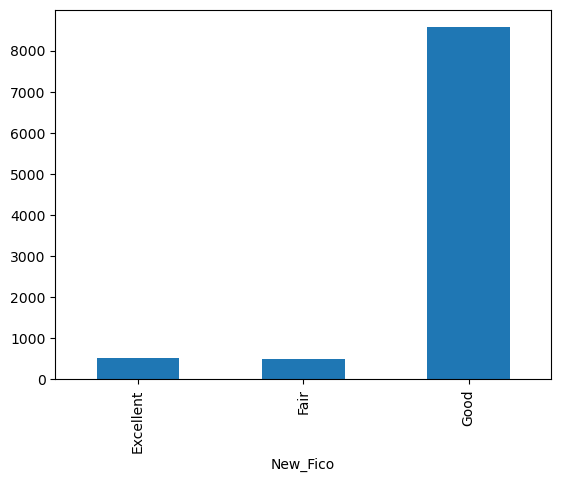

In [20]:
#plot Number of loans by New_Fico Category
catplot.plot.bar()
plt.show()

In [21]:
purplot=df.groupby(['purpose']).size()
purplot

purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64

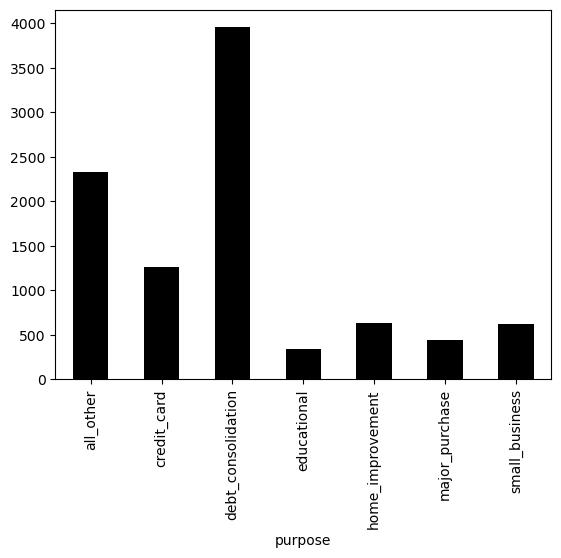

In [22]:
#plot Number of purpose category
purplot.plot.bar(color='black')
plt.show()

In [23]:
ratplot=df.groupby(['int_rate_type']).size()
ratplot

int_rate_type
High    5221
Low     4357
dtype: int64

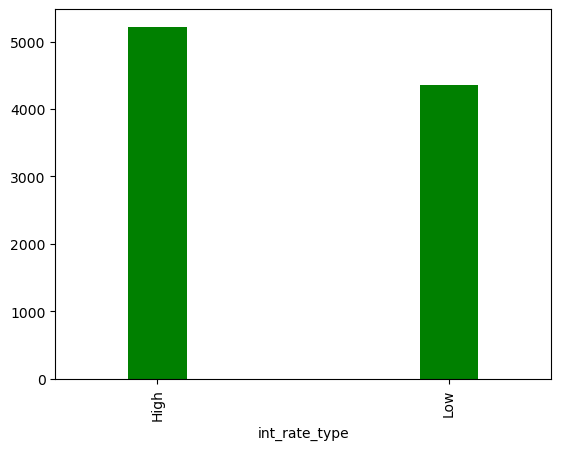

In [24]:
#plot Number of loans by New_Fico Category
ratplot.plot.bar(color='green',width=0.2)
plt.show()

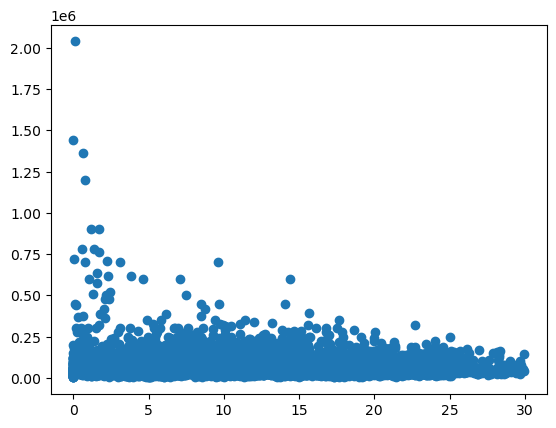

In [25]:
#using scatter plot to get dti/annualincame
y=df['annual_income']
x=df['dti']
plt.scatter(x,y)
plt.show()

it shows high incame less dti


In [26]:
#save as CSV
df.to_csv('loan_cleaned.csv',index=True)